 #  Titanic Survival Prediction Using Machine Learning 

## Import All Libraries

In [12]:
import pandas as pd #linear algebra
import numpy as np #data processing csv file
import seaborn as sns #
import matplotlib.pyplot as plt

In [13]:
# Load the dataset
file_path = "D:/Shreya/Codesoft/Titanic/Titanic-Dataset.csv"
df = pd.read_csv(file_path)

In [14]:
# Check for missing values and basic statistics
missing_values = df.isnull().sum()
basic_info = df.describe(include="all")

In [15]:
# Display the first few rows to understand the data
head = df.head()

In [16]:
print(head)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [17]:
missing_values, basic_info, head

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64,
         PassengerId    Survived      Pclass                     Name   Sex  \
 count    891.000000  891.000000  891.000000                      891   891   
 unique          NaN         NaN         NaN                      891     2   
 top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
 freq            NaN         NaN         NaN                        1   577   
 mean     446.000000    0.383838    2.308642                      NaN   NaN   
 std      257.353842    0.486592    0.836071                      NaN   NaN   
 min        1.000000    0.000000    1.000000                      NaN   NaN   
 25%      223.500000    0.000000    2.000000                      NaN   NaN   
 50%      446.000000    0.000000  

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

Summary of the Dataset:
Total records: 889

Target column: Survived (1 = Survived, 0 = Did not survive)

Key features: Pclass, Sex, Age, Fare, SibSp, Parch, Embarked

In [21]:
ab = df.groupby("Survived").mean()
ab
v1 = ab.iloc[0,:]
v2 = ab.iloc[1,:]
abs((v2-v1)/(v1+v2))

TypeError: Could not convert Braund, Mr. Owen HarrisAllen, Mr. William HenryMoran, Mr. JamesMcCarthy, Mr. Timothy JPalsson, Master. Gosta LeonardSaundercock, Mr. William HenryAndersson, Mr. Anders JohanVestrom, Miss. Hulda Amanda AdolfinaRice, Master. EugeneVander Planke, Mrs. Julius (Emelia Maria Vandemoortele)Fynney, Mr. Joseph JPalsson, Miss. Torborg DaniraEmir, Mr. Farred ChehabFortune, Mr. Charles AlexanderTodoroff, Mr. LalioUruchurtu, Don. Manuel EWheadon, Mr. Edward HMeyer, Mr. Edgar JosephHolverson, Mr. Alexander OskarCann, Mr. Ernest CharlesVander Planke, Miss. Augusta MariaAhlin, Mrs. Johan (Johanna Persdotter Larsson)Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott)Kraeff, Mr. TheodorRogers, Mr. William JohnLennon, Mr. DenisSamaan, Mr. YoussefArnold-Franchi, Mrs. Josef (Josefine Franchi)Panula, Master. Juha NiiloNosworthy, Mr. Richard CaterOstby, Mr. Engelhart CorneliusNovel, Mr. MansouerGoodwin, Master. William FrederickSirayanian, Mr. OrsenHarris, Mr. Henry BirkhardtSkoog, Master. HaraldStewart, Mr. Albert ACrease, Mr. Ernest JamesKink, Mr. VincenzJenkin, Mr. Stephen CurnowGoodwin, Miss. Lillian AmyHood, Mr. Ambrose JrChronopoulos, Mr. ApostolosMoen, Mr. Sigurd HansenStaneff, Mr. IvanMoutal, Mr. Rahamin HaimWaelens, Mr. AchilleCarrau, Mr. Francisco MFord, Mr. William NealSlocovski, Mr. Selman FrancisCelotti, Mr. FrancescoChristmann, Mr. EmilAndreasson, Mr. Paul EdvinChaffee, Mr. Herbert FullerDean, Mr. Bertram FrankCoxon, Mr. DanielShorney, Mr. Charles JosephGoldschmidt, Mr. George BKantor, Mr. SinaiPetranec, Miss. MatildaPetroff, Mr. Pastcho ("Pentcho")White, Mr. Richard FrasarJohansson, Mr. Gustaf JoelGustafsson, Mr. Anders VilhelmMionoff, Mr. StoytchoRekic, Mr. TidoPorter, Mr. Walter ChamberlainZabour, Miss. HileniBarton, Mr. David JohnJussila, Miss. KatriinaAttalah, Miss. MalakePekoniemi, Mr. EdvardConnors, Mr. PatrickTurpin, Mr. William John RobertBaxter, Mr. Quigg EdmondAndersson, Miss. Ellis Anna MariaHickman, Mr. Stanley GeorgeMoore, Mr. Leonard CharlesNasser, Mr. NicholasWhite, Mr. Percival WaylandMcMahon, Mr. MartinEkstrom, Mr. JohanDrazenoic, Mr. JozefCoelho, Mr. Domingos FernandeoRobins, Mrs. Alexander A (Grace Charity Laury)Sobey, Mr. Samuel James HaydenRichard, Mr. EmileFutrelle, Mr. Jacques HeathOsen, Mr. Olaf ElonGiglio, Mr. VictorBoulos, Mrs. Joseph (Sultana)Burke, Mr. JeremiahAndrew, Mr. Edgardo SamuelNicholls, Mr. Joseph CharlesFord, Miss. Robina Maggie "Ruby"Navratil, Mr. Michel ("Louis M Hoffman")Byles, Rev. Thomas Roussel DavidsBateman, Rev. Robert JamesMeo, Mr. Alfonzovan Billiard, Mr. Austin BlylerOlsen, Mr. Ole MartinWilliams, Mr. Charles DuaneCorn, Mr. HarrySmiljanic, Mr. MileSage, Master. Thomas HenryCribb, Mr. John HatfieldBengtsson, Mr. John ViktorCalic, Mr. JovoPanula, Master. Eino ViljamiSkoog, Mrs. William (Anna Bernhardina Karlsson)Baumann, Mr. John DLing, Mr. LeeVan der hoef, Mr. WyckoffRice, Master. ArthurSivola, Mr. Antti WilhelmSmith, Mr. James ClinchKlasen, Mr. Klas AlbinLefebre, Master. Henry ForbesIsham, Miss. Ann ElizabethHale, Mr. ReginaldLeonard, Mr. LionelSage, Miss. Constance GladysPernot, Mr. ReneAsplund, Master. Clarence Gustaf HugoRood, Mr. Hugh RoscoeBourke, Mr. JohnTurcin, Mr. StjepanCarbines, Mr. WilliamMernagh, Mr. RobertOlsen, Mr. Karl Siegwart AndreasYrois, Miss. Henriette ("Mrs Harbeck")Vande Walle, Mr. Nestor CyrielSage, Mr. FrederickJohanson, Mr. Jakob AlfredYouseff, Mr. GeriousStrom, Miss. Telma MatildaBackstrom, Mr. Karl AlfredAli, Mr. AhmedPerkin, Mr. John HenryGivard, Mr. Hans KristensenKiernan, Mr. PhilipJacobsohn, Mr. Sidney SamuelHarris, Mr. WalterBracken, Mr. James HGreen, Mr. George HenryNenkoff, Mr. ChristoBerglund, Mr. Karl Ivar SvenLovell, Mr. John Hall ("Henry")Fahlstrom, Mr. Arne JonasLefebre, Miss. MathildeLarsson, Mr. Bengt EdvinSjostedt, Mr. Ernst AdolfLeyson, Mr. Robert William NormanHarknett, Miss. Alice PhoebeHold, Mr. StephenPengelly, Mr. Frederick WilliamHunt, Mr. George HenryZabour, Miss. ThamineColeridge, Mr. Reginald CharlesMaenpaa, Mr. Matti AlexanteriAttalah, Mr. SleimanMinahan, Dr. William EdwardLindahl, Miss. Agda Thorilda ViktoriaCarter, Rev. Ernest CourtenayReed, Mr. James GeorgeStrom, Mrs. Wilhelm (Elna Matilda Persson)Stead, Mr. William ThomasLobb, Mr. William ArthurRosblom, Mrs. Viktor (Helena Wilhelmina)Smith, Mr. ThomasTaussig, Mr. EmilHarrison, Mr. WilliamHenry, Miss. DeliaReeves, Mr. DavidPanula, Mr. Ernesti ArvidCairns, Mr. AlexanderNatsch, Mr. Charles HLindblom, Miss. Augusta CharlottaParkes, Mr. Francis "Frank"Rice, Master. EricDuane, Mr. FrankOlsson, Mr. Nils Johan Goranssonde Pelsmaeker, Mr. AlfonsSmith, Mr. Richard WilliamStankovic, Mr. IvanNaidenoff, Mr. PenkoLevy, Mr. Rene JacquesHaas, Miss. AloisiaMineff, Mr. IvanLewy, Mr. Ervin GHanna, Mr. MansourAllison, Miss. Helen LoraineJohnson, Mr. William Cahoone JrWilliams, Mr. Howard Hugh "Harry"Abelson, Mr. SamuelLahtinen, Mrs. William (Anna Sylfven)Hendekovic, Mr. IgnjacHart, Mr. BenjaminMoraweck, Dr. ErnestDennis, Mr. SamuelDanoff, Mr. YotoSage, Mr. George John JrNysveen, Mr. Johan HansenPartner, Mr. AustenGraham, Mr. George EdwardVander Planke, Mr. Leo EdmondusDenkoff, Mr. MittoPears, Mr. Thomas ClintonBlackwell, Mr. Stephen WeartCollander, Mr. Erik GustafSedgwick, Mr. Charles Frederick WaddingtonFox, Mr. Stanley HubertDimic, Mr. JovanOdahl, Mr. Nils MartinWilliams-Lambert, Mr. Fletcher FellowsElias, Mr. TannousArnold-Franchi, Mr. JosefYousif, Mr. WazliVanden Steen, Mr. Leo PeterFunk, Miss. Annie ClemmerSkoog, Mr. Wilhelmdel Carlo, Mr. SebastianoBarbara, Mrs. (Catherine David)Asim, Mr. AdolaO'Brien, Mr. ThomasAdahl, Mr. Mauritz Nils MartinWiklund, Mr. Jakob AlfredBeavan, Mr. William ThomasRinghini, Mr. SantePalsson, Miss. Stina ViolaWidener, Mr. Harry ElkinsBetros, Mr. TannousGustafsson, Mr. Karl GideonTikkanen, Mr. JuhoPlotcharsky, Mr. VasilDavies, Mr. Charles HenryGoodwin, Master. Sidney LeonardSadlier, Mr. MatthewGustafsson, Mr. Johan BirgerJohansson, Mr. ErikOlsson, Miss. ElinaMcKane, Mr. Peter DavidPain, Dr. AlfredAdams, Mr. JohnJussila, Miss. Mari AinaHakkarainen, Mr. Pekka PietariOreskovic, Miss. MarijaGale, Mr. ShadrachWidegren, Mr. Carl/Charles PeterBirkeland, Mr. Hans Martin MonsenLefebre, Miss. IdaSdycoff, Mr. TodorHart, Mr. HenryCunningham, Mr. Alfred FlemingMeek, Mrs. Thomas (Annie Louise Rowley)Matthews, Mr. William JohnVan Impe, Miss. CatharinaGheorgheff, Mr. StanioCharters, Mr. DavidZimmerman, Mr. LeoDanbom, Mrs. Ernst Gilbert (Anna Sigrid Maria Brogren)Rosblom, Mr. Viktor RichardWiseman, Mr. PhillippeFlynn, Mr. JamesKallio, Mr. Nikolai ErlandSilvey, Mr. William BairdFord, Miss. Doolina Margaret "Daisy"Fortune, Mr. MarkKvillner, Mr. Johan Henrik JohannessonHampe, Mr. LeonPetterson, Mr. Johan EmilWest, Mr. Edwy ArthurHagland, Mr. Ingvald Olai OlsenForeman, Mr. Benjamin LaventallPeduzzi, Mr. JosephMillet, Mr. Francis DavisO'Connor, Mr. MauriceMorley, Mr. WilliamGee, Mr. Arthur HMilling, Mr. Jacob ChristianMaisner, Mr. SimonGoncalves, Mr. Manuel EstanslasCampbell, Mr. WilliamSmart, Mr. John MontgomeryScanlan, Mr. JamesKeefe, Mr. ArthurCacic, Mr. LukaStrandberg, Miss. Ida SofiaClifford, Mr. George QuincyRenouf, Mr. Peter HenryBraund, Mr. Lewis RichardKarlsson, Mr. Nils AugustGoodwin, Master. Harold VictorFrost, Mr. Anthony Wood "Archie"Rouse, Mr. Richard HenryLefebre, Miss. JeannieKent, Mr. Edward AustinSomerton, Mr. Francis WilliamHagland, Mr. Konrad Mathias ReiersenWindelov, Mr. EinarMolson, Mr. Harry MarklandArtagaveytia, Mr. RamonStanley, Mr. Edward RolandYousseff, Mr. GeriousShellard, Mr. Frederick WilliamAllison, Mrs. Hudson J C (Bessie Waldo Daniels)Svensson, Mr. OlofCalic, Mr. PetarCanavan, Miss. MaryO'Sullivan, Miss. Bridget MaryLaitinen, Miss. Kristina SofiaPenasco y Castellana, Mr. Victor de SatodeOlsen, Mr. Henry MargidoWebber, Mr. JamesColeff, Mr. SatioWalker, Mr. William AndersonRyan, Mr. PatrickPavlovic, Mr. StefoVovk, Mr. JankoLahoud, Mr. SarkisKassem, Mr. FaredFarrell, Mr. JamesFarthing, Mr. JohnSalonen, Mr. Johan WernerHocking, Mr. Richard GeorgeToufik, Mr. NakliElias, Mr. Joseph JrCacic, Miss. MarijaButt, Major. Archibald WillinghamRisien, Mr. Samuel BeardAndersson, Miss. Ingeborg ConstanziaAndersson, Miss. Sigrid ElisabethDouglas, Mr. Walter DonaldNicholson, Mr. Arthur ErnestGoldsmith, Mr. Frank JohnSharp, Mr. Percival James RO'Brien, Mr. TimothyWright, Mr. GeorgeRobbins, Mr. VictorMorrow, Mr. Thomas RowanSivic, Mr. HuseinNorman, Mr. Robert DouglasSimmons, Mr. JohnMeanwell, Miss. (Marion Ogden)Davies, Mr. Alfred JStoytcheff, Mr. IliaPalsson, Mrs. Nils (Alma Cornelia Berglund)Doharr, Mr. TannousRush, Mr. Alfred George JohnPatchett, Mr. GeorgeCaram, Mrs. Joseph (Maria Elias)Downton, Mr. William JamesRoss, Mr. John HugoPaulner, Mr. UscherJarvis, Mr. John DenzilGilinski, Mr. EliezerMurdlin, Mr. JosephRintamaki, Mr. MattiElsbury, Mr. William JamesBourke, Miss. MaryChapman, Mr. John HenryVan Impe, Mr. Jean BaptisteJohnson, Mr. AlfredBoulos, Mr. HannaSlabenoff, Mr. PetcoHarrington, Mr. Charles HTorber, Mr. Ernst WilliamLindell, Mr. Edvard BengtssonKaraic, Mr. MilanAndersson, Mrs. Anders Johan (Alfrida Konstantia Brogren)Jardin, Mr. Jose NetoHorgan, Mr. JohnBrocklebank, Mr. William AlfredDanbom, Mr. Ernst GilbertLobb, Mrs. William Arthur (Cordelia K Stanlick)Gavey, Mr. LawrenceYasbeck, Mr. AntoniHansen, Mr. Henry DamsgaardBowen, Mr. David John "Dai"Sutton, Mr. FrederickKirkland, Rev. Charles LeonardBostandyeff, Mr. GuentchoO'Connell, Mr. Patrick DLundahl, Mr. Johan SvenssonParr, Mr. William Henry MarshSkoog, Miss. MabelLeinonen, Mr. Antti GustafCollyer, Mr. HarveyPanula, Mrs. Juha (Maria Emilia Ojala)Thorneycroft, Mr. PercivalJensen, Mr. Hans PederSkoog, Miss. Margit ElizabethCor, Mr. LiudevitWilley, Mr. EdwardMitkoff, Mr. MitoKalvik, Mr. Johannes HalvorsenHegarty, Miss. Hanora "Nora"Hickman, Mr. Leonard MarkRadeff, Mr. AlexanderBourke, Mrs. John (Catherine)Eitemiller, Mr. George FloydNewell, Mr. Arthur WebsterBadt, Mr. MohamedColley, Mr. Edward PomeroyColeff, Mr. PejuHickman, Mr. LewisButler, Mr. Reginald FentonRommetvedt, Mr. Knud PaustCook, Mr. JacobDavidson, Mr. ThorntonMitchell, Mr. Henry MichaelWatson, Mr. Ennis HastingsEdvardsson, Mr. Gustaf HjalmarSawyer, Mr. Frederick CharlesGoodwin, Mrs. Frederick (Augusta Tyler)Peters, Miss. KatieOlsvigen, Mr. Thor AndersonGoodwin, Mr. Charles EdwardBrown, Mr. Thomas William SolomonLaroche, Mr. Joseph Philippe LemercierPanula, Mr. Jaako ArnoldDakic, Mr. BrankoFischer, Mr. Eberhard ThelanderSaad, Mr. KhalilWeir, Col. JohnChapman, Mr. Charles HenryKelly, Mr. JamesThayer, Mr. John BorlandHumblen, Mr. Adolf Mathias Nicolai OlsenBarbara, Miss. SaiideGallagher, Mr. MartinHansen, Mr. Henrik JuulMorley, Mr. Henry Samuel ("Mr Henry Marshall")Klaber, Mr. HermanLarsson, Mr. August ViktorGreenberg, Mr. SamuelSoholt, Mr. Peter Andreas Lauritz AndersenMcEvoy, Mr. MichaelJohnson, Mr. Malkolm JoackimJensen, Mr. Svend LauritzGillespie, Mr. William HenryHodges, Mr. Henry PriceOreskovic, Mr. LukaBryhl, Mr. Kurt Arnold GottfridIlmakangas, Miss. Pieta SofiaHassan, Mr. Houssein G NKnight, Mr. Robert JBerriman, Mr. William JohnTroupiansky, Mr. Moses AaronWilliams, Mr. LeslieFord, Mrs. Edward (Margaret Ann Watson)Ivanoff, Mr. KanioNankoff, Mr. MinkoCavendish, Mr. Tyrell WilliamMcNamee, Mr. NealCrosby, Capt. Edward GiffordAbbott, Mr. Rossmore EdwardMarvin, Mr. Daniel WarnerConnaghton, Mr. MichaelVande Velde, Mr. Johannes JosephJonkoff, Mr. LalioCarlsson, Mr. August SigfridBailey, Mr. Percy AndrewTheobald, Mr. Thomas LeonardGarfirth, Mr. JohnNirva, Mr. Iisakki Antino AijoEklund, Mr. Hans LinusBrewe, Dr. Arthur JacksonMangan, Miss. MaryMoran, Mr. Daniel JGronnestad, Mr. Daniel DanielsenLievens, Mr. Rene AimeJensen, Mr. Niels PederMack, Mrs. (Mary)Elias, Mr. DiboMyhrman, Mr. Pehr Fabian Oliver MalkolmTobin, Mr. RogerKilgannon, Mr. Thomas JLong, Mr. Milton ClydeJohnston, Mr. Andrew GAli, Mr. WilliamHarmer, Mr. Abraham (David Lishin)Rice, Master. George HughGuggenheim, Mr. BenjaminKeane, Mr. Andrew "Andy"Gaskell, Mr. AlfredSage, Miss. Stella AnnaHoyt, Mr. William FisherDantcheff, Mr. RistiuOtter, Mr. RichardIbrahim Shawah, Mr. YousseffVan Impe, Mrs. Jean Baptiste (Rosalie Paula Govaert)Ponesell, Mr. MartinJohansson, Mr. Karl JohanAndrews, Mr. Thomas JrPettersson, Miss. Ellen NataliaMeyer, Mr. AugustAlexander, Mr. WilliamLester, Mr. JamesSlemen, Mr. Richard JamesAndersson, Miss. Ebba Iris AlfridaTomlin, Mr. Ernest PortageFry, Mr. RichardHeininen, Miss. Wendla MariaMallet, Mr. AlbertHolm, Mr. John Fredrik AlexanderSkoog, Master. Karl ThorstenReuchlin, Jonkheer. John GeorgePanula, Master. Urho AbrahamFlynn, Mr. JohnLam, Mr. LenSaad, Mr. AminAugustsson, Mr. AlbertAllum, Mr. Owen GeorgePasic, Mr. JakobSirota, Mr. MauriceAlhomaki, Mr. Ilmari RudolfMudd, Mr. Thomas CharlesLemberopolous, Mr. Peter LCulumovic, Mr. JesoAbbing, Mr. AnthonySage, Mr. Douglas BullenMarkoff, Mr. MarinHarper, Rev. JohnAndersson, Master. Sigvard Harald EliasSvensson, Mr. JohanBoulos, Miss. NourelainCarter, Mrs. Ernest Courtenay (Lilian Hughes)Razi, Mr. RaihedHansen, Mr. Claus PeterGiles, Mr. Frederick EdwardSage, Miss. Dorothy Edith "Dolly"Gill, Mr. John WilliamRoebling, Mr. Washington Augustus IIvan Melkebeke, Mr. PhilemonBalkic, Mr. CerinCarlsson, Mr. Frans OlofVander Cruyssen, Mr. VictorGustafsson, Mr. Alfred OssianPetroff, Mr. NedelioLaleff, Mr. KristoMarkun, Mr. JohannDahlberg, Miss. Gerda UlrikaBanfield, Mr. Frederick JamesSutehall, Mr. Henry JrRice, Mrs. William (Margaret Norton)Montvila, Rev. JuozasJohnston, Miss. Catherine Helen "Carrie"Dooley, Mr. Patrick to numeric

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


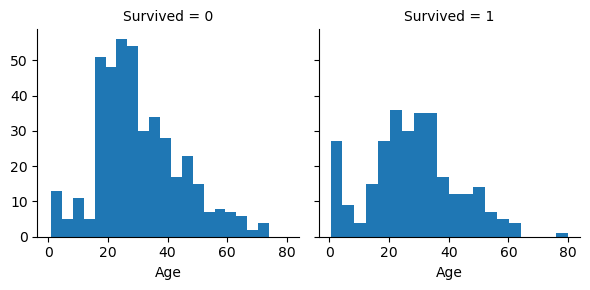

In [22]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


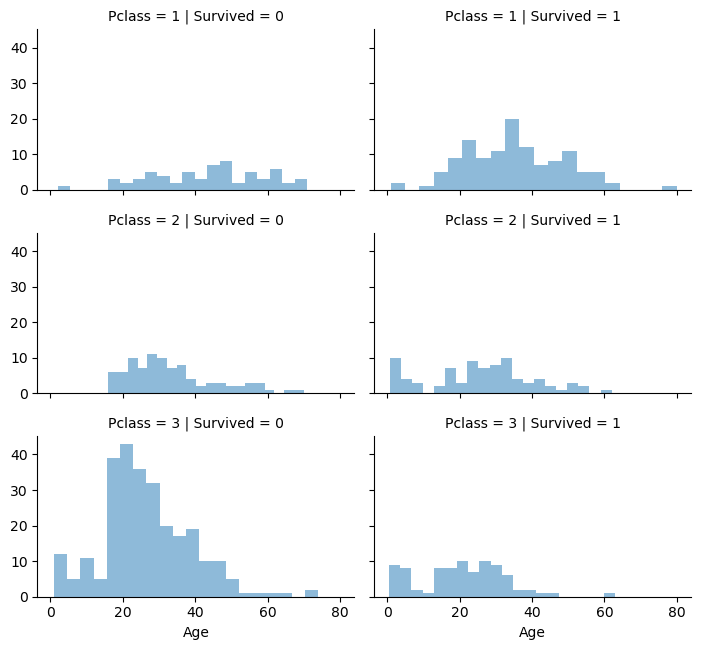

In [23]:
# grid = sns.FacetGrid(df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


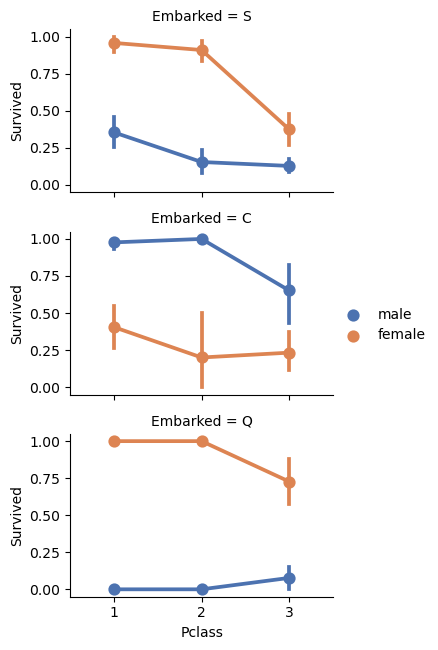

In [24]:
# grid = sns.FacetGrid(df, col='Embarked')
grid = sns.FacetGrid(df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\DELL\anaconda3\L

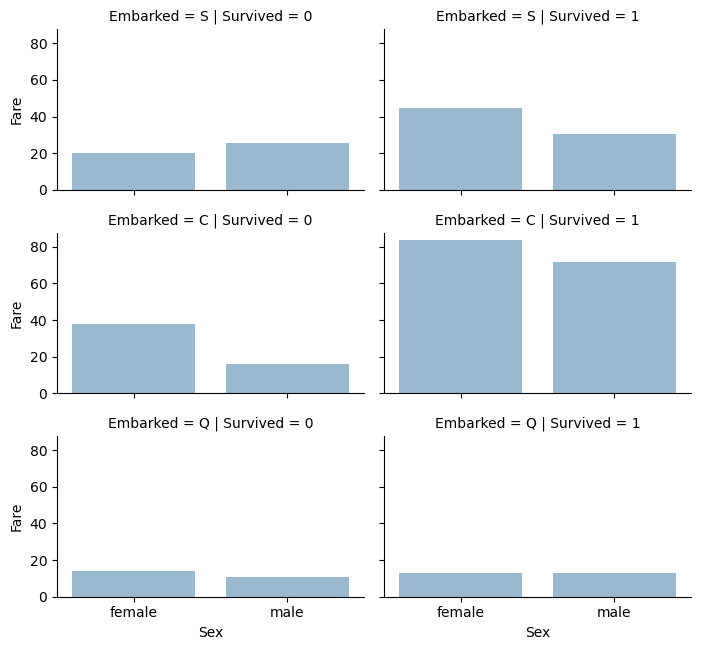

In [25]:
grid = sns.FacetGrid(df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

<Axes: >

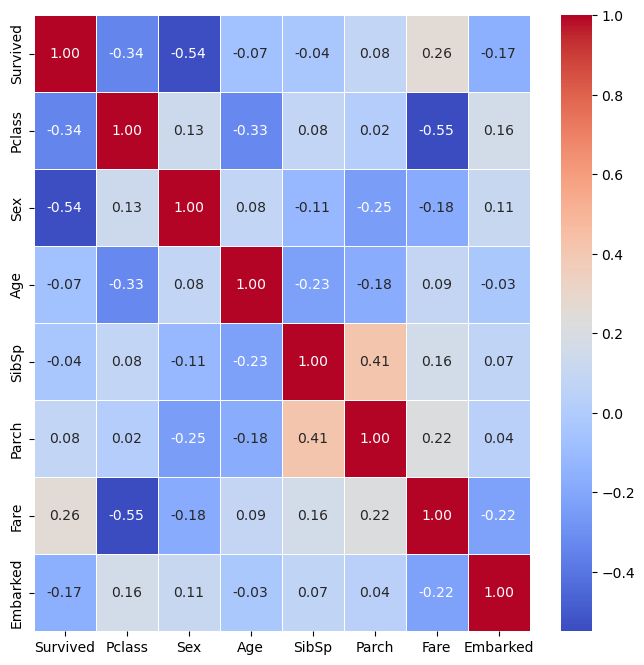

In [33]:
corr = df.corr()
plt.subplots(figsize=(8,8))
#sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
#sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True)
sns.heatmap(corr, 
            xticklabels=corr.columns, 
            yticklabels=corr.columns, 
            annot=True, 
            fmt=".2f", 
            cmap="coolwarm", 
            linewidths=0.5)

Missing Data:
Age: 177 missing values

Cabin: 687 missing values (mostly empty)

Embarked: 2 missing

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
df = pd.read_csv("D:/Shreya/Codesoft/Titanic/Titanic-Dataset.csv")

# Drop columns not useful for prediction
df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

# Handle missing values
imputer = SimpleImputer(strategy="most_frequent")
df["Age"] = SimpleImputer(strategy="mean").fit_transform(df[["Age"]])
#df["Embarked"] = imputer.fit_transform(df[["Embarked"]])
df["Embarked"] = imputer.fit_transform(df[["Embarked"]])[:, 0]

# Encode categorical variables
label_encoders = {}
for column in ["Sex", "Embarked"]:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

    # Define features and target
X = df.drop(columns=["Survived"])
y = df["Survived"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model using Random forest 
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)

Accuracy: 0.8101
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [28]:
from sklearn.model_selection import train_test_split, cross_val_score


def classify(model):
    x_train, x_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=40
    )
    model.fit(x_train, y_train)
    print("Accuracy", model.score(x_test, y_test))

    score = cross_val_score(model, X, y, cv=5)
    print("CV SCORE :", np.mean(score))

In [29]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
classify(model)

Accuracy 0.7713004484304933
CV SCORE : 0.7688343481262947


In [31]:
!pip install xgboost

  Using cached xgboost-3.0.0-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.0-py3-none-win_amd64.whl (150.0 MB)


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
from xgboost import XGBClassifier

model = XGBClassifier()
classify(model)

Accuracy 0.7937219730941704
CV SCORE : 0.8159751428033394


In [39]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
classify(model)

Accuracy 0.8026905829596412
CV SCORE : 0.8103571652752496


In [40]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
classify(model)

Accuracy 0.7937219730941704
CV SCORE : 0.8002573598644153


In [41]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
classify(model)

Accuracy 0.8071748878923767
CV SCORE : 0.786761659657272


In [42]:
model = XGBClassifier()
model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [52]:
# Predict and evaluate
y_pred = model.predict(X_test)

print(y_pred)

accuracy = accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)


[1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1]
Accuracy: 0.9888
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       105
           1       1.00      0.97      0.99        74

    accuracy                           0.99       179
   macro avg       0.99      0.99      0.99       179
weighted avg       0.99      0.99      0.99       179



In [54]:
submit = pd.read_csv("D:/Shreya/Codesoft/Titanic/gender_submission.csv")
submit

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [58]:
submit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [59]:
submit.to_csv("Submission.csv", index=False)